# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [4]:
from matplotlib import pyplot as plt
from math import atan2


def get_region(points):
    min_y = 0
    min_x = 0
    max_y = 0
    max_x = 0

    n = len(points)
    for i in range(0, n):
        if points[i][1] < points[min_y][1]:
            min_y = i
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][1] > points[max_y][1]:
            max_y = i
        if points[i][0] > points[max_x][0]:
            max_x = i

    a = points[max_y]  # top
    b = points[min_x]  # left
    c = points[min_y]  # bottom
    d = points[max_x]  # right

    #print(a, b, c, d)

    region_1 = [a, b, d]
    region_2 = [b, c, d]

    for p in points:
        if p[0] < a[0] and p[1] > b[1] and det2(b, a, p) >= 0 or p[0] > a[0] and p[1] > d[1] and det2(a, d, p) >= 0:
            region_1.append(p)
        if p[0] < c[0] and p[1] < b[1] and det2(b, c, p) <= 0 or p[0] > c[0] and p[1] < d[1] and det2(c, d, p) <= 0:
            region_2.append(p)


    #print("region1 and 2",[region_1, region_2])

    region_1_sorted = sorted(region_1, key=lambda x: x[0])
    region_2_sorted = sorted(region_2, key=lambda x: -x[0])

    return ([region_1_sorted, region_2_sorted])

import matplotlib.pyplot as plt

def det2(p1,p2,p3):
   return (p2[0] - p1[0]) * (p3[1] - p1[1]) \
          - (p2[1] - p1[1]) * (p3[0] - p1[0])


def det(p1, p2, p3):
    S = ((p2[1] - p1[1]) * (p3[0] - p2[0])) + ((p1[0] - p2[0]) * (p3[1] - p2[1]))
    return S


def extendedgrahamscan(inputSet):
    sorted_points = get_region(inputSet)

    #scatter_plot(inputSet, sorted_points)
    
    outputSet = []

    for i in range(2):
        outputSet.append(sorted_points[i].pop(0))
        outputSet.append(sorted_points[i][0])
        for point in sorted_points[i][1:]:
            while det(outputSet[-2], outputSet[-1], point) < 0:
                outputSet.pop()
                if len(outputSet) <=2:
                    break
            outputSet.append(point)

    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [5]:
import random

#code for random data generation

def random_data(N):
    inputlista = [[random.randint(0, 32767) for j in range(1, 3)] for i in range(N)] #get N pairs random points
    return inputlista 
#code for worst case data generation

#Just one example
def worst_case_data(N):
    inputlistb = [[random.randint(1, 32766) for j in range(1, 3)] for i in range(N-4)] 
    inputlistb.append([16383,32766])
    inputlistb.append([16383,0])
    inputlistb.append([0,16383])
    inputlistb.append([32766,16383])
    return inputlistb



Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [6]:
import timeit

#test code
# random data time
timelista = []
# for N in [100,500, 1000, 5000, 10000, 15000,20000]:
for N in [100,500,1000,5000,10000,15000,20000]:
    inputlista = random_data(N)
    t = timeit.timeit("extendedgrahamscan(inputlista)","from __main__ import extendedgrahamscan, inputlista",number=1)
    timelista.append(t)

timelistb = []
for N in [100,500,1000,5000,10000,15000,20000]:
    inputlistb = worst_case_data(N)
    t = timeit.timeit("extendedgrahamscan(inputlistb)","from __main__ import extendedgrahamscan, inputlistb",number=1)
    timelistb.append(t)

print(timelista)
print(timelistb)

[9.449999998878411e-05, 0.0004242999999917174, 0.0008063999999876614, 0.005232799999987492, 0.010759699999994154, 0.013273999999995567, 0.017887400000006437]
[0.00014289999998595704, 0.00042479999999045504, 0.0008775000000014188, 0.004292499999991151, 0.008564399999983152, 0.016611699999998564, 0.02459759999999278]


*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

17
18
18
26
65
124
336


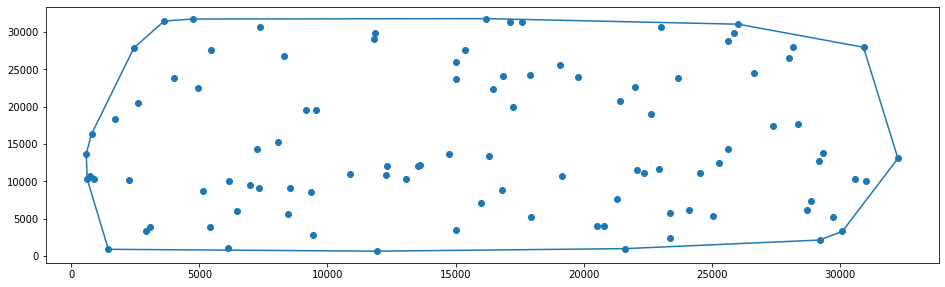

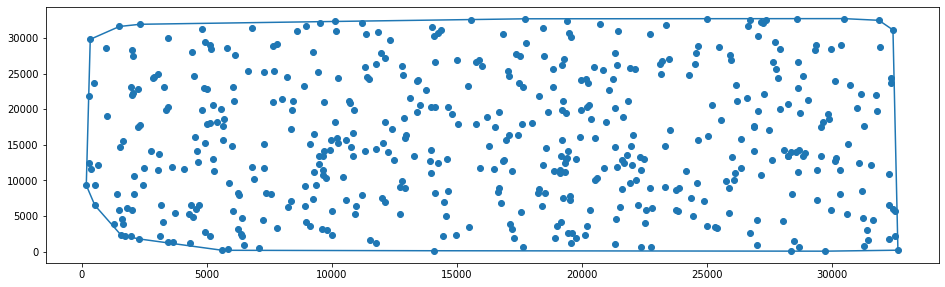

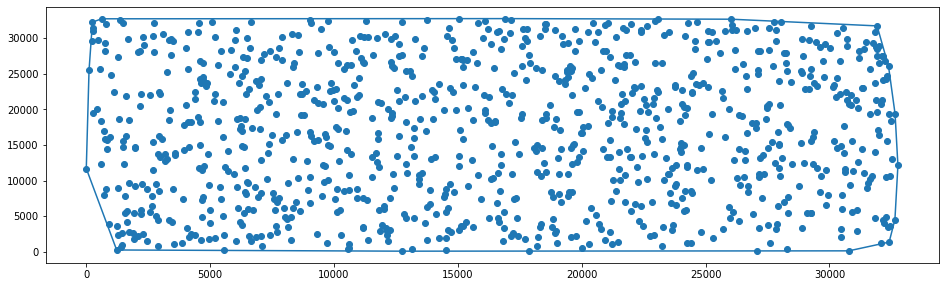

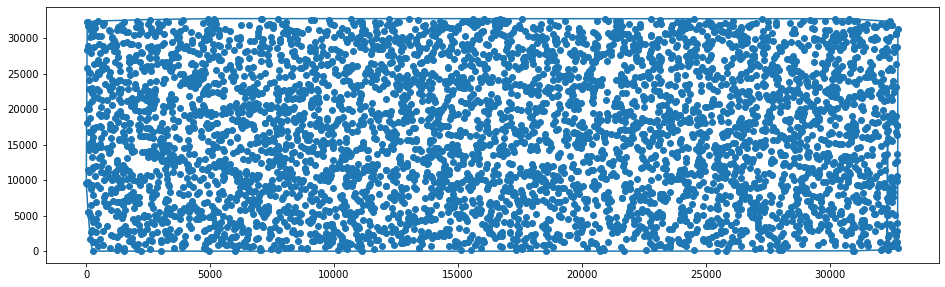

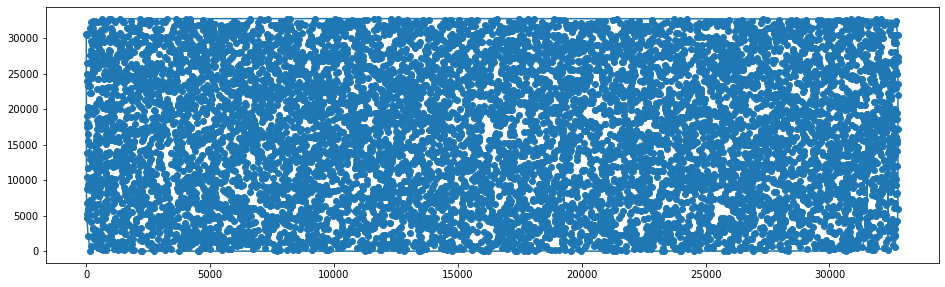

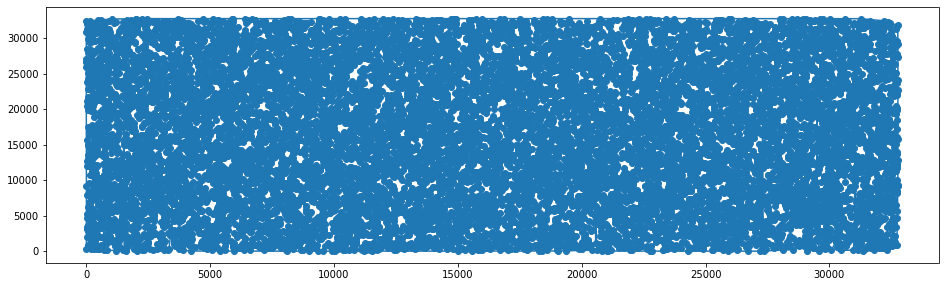

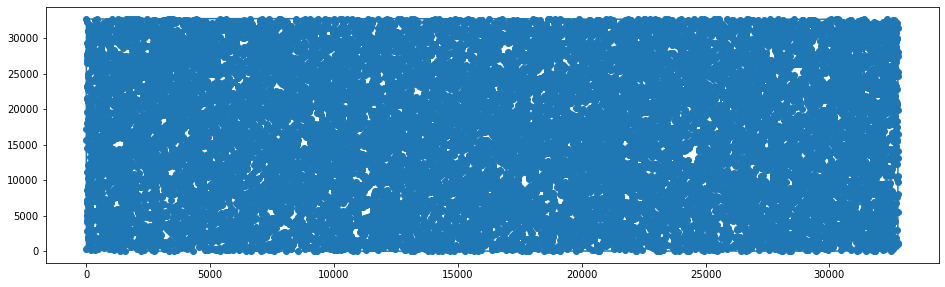

In [7]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

for N in [100,500, 1000,5000,10000,15000,20000]:
    inputSet = random_data(N)
    outputSet = extendedgrahamscan(inputSet)

    i=1
    plt.figure(figsize=(16,16))
    plt.subplot(3,1,i)
    print(len(outputSet))


    #first do a scatter plot of the inputSet
    input_xs, input_ys = zip(*inputSet)
    plt.scatter(input_xs, input_ys)

    #then do a polygon plot of the computed covex hull
    outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
    output_xs, output_ys = zip(*outputSet) 
    plt.plot(output_xs, output_ys) 

plt.show() 

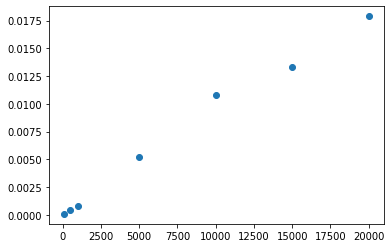

In [8]:
import matplotlib.pyplot as plt
x = [100,500,1000,5000,10000,15000,20000]
plt.figure()
plt.scatter(x,timelista)
plt.show()

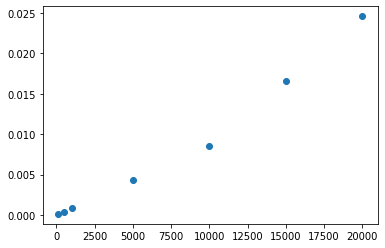

In [9]:
import matplotlib.pyplot as plt
x = [100,500,1000,5000,10000,15000,20000]
plt.figure()
plt.scatter(x,timelistb)
plt.show()